In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('/content/historical_weather.csv')

In [10]:
# Replace 'Date' with the name of your date column
df['Date'] = pd.to_datetime(df['date'])
df.set_index('Date', inplace=True)

# Display basic statistics
print(df.describe())


          avg_temp_c     min_temp_c     max_temp_c  precipitation_mm  \
count  181114.000000  176452.000000  174845.000000     112594.000000   
mean       19.137516      14.627775      23.887261          3.679964   
std         9.902722      10.004998      10.446670         11.294167   
min       -34.700000     -43.800000     -28.500000          0.000000   
25%        12.400000       7.500000      17.100000          0.000000   
50%        21.400000      16.200000      27.000000          0.000000   
75%        27.100000      23.300000      31.500000          2.300000   
max        41.900000      38.900000      49.100000        496.100000   

       snow_depth_mm  avg_wind_dir_deg  avg_wind_speed_kmh  
count   12238.000000     146944.000000       159866.000000  
mean      342.481696        175.650289           11.281875  
std      1020.265388        105.435150            6.132884  
min         0.000000          0.000000            0.000000  
25%         0.000000         83.000000        

In [25]:
null_counts = df.isnull().sum()

In [26]:
null_counts

city_id                    0
date                       0
avg_temp_c              1224
min_temp_c              5886
max_temp_c              7493
precipitation_mm       69744
snow_depth_mm         170100
avg_wind_dir_deg       35394
avg_wind_speed_kmh     22472
dtype: int64

In [18]:
df1 = df[df['city_id'] == 'C001']

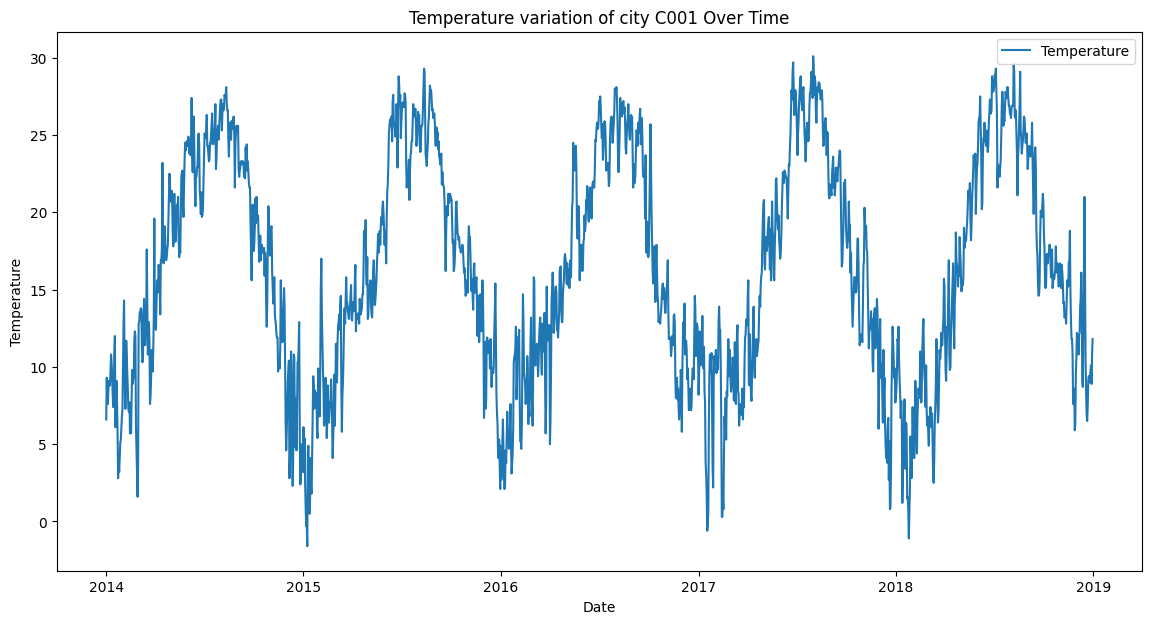

In [19]:
plt.figure(figsize=(14, 7))
plt.plot(df1.index, df1['avg_temp_c'], label='Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature variation of city C001 Over Time')
plt.legend()
plt.show()


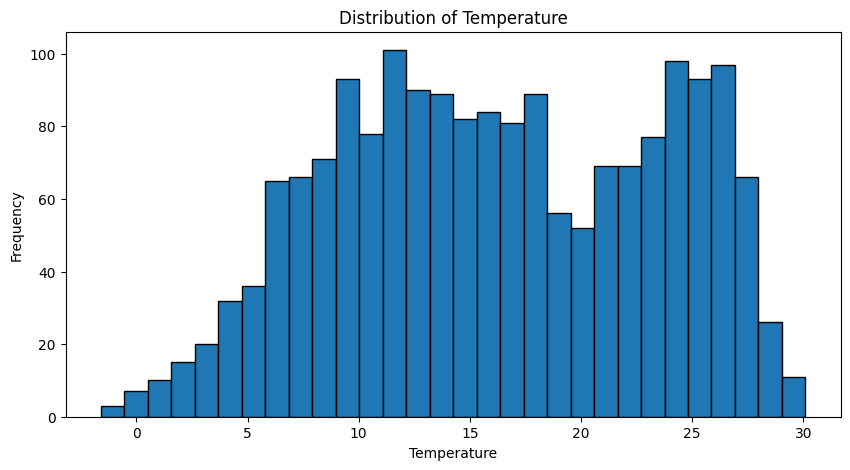

In [20]:
plt.figure(figsize=(10, 5))
plt.hist(df1['avg_temp_c'], bins=30, edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')
plt.show()


<ipython-input-21-9419a36a0365>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Month'] = df1.index.month
<ipython-input-21-9419a36a0365>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Year'] = df1.index.year


<Figure size 1200x600 with 0 Axes>

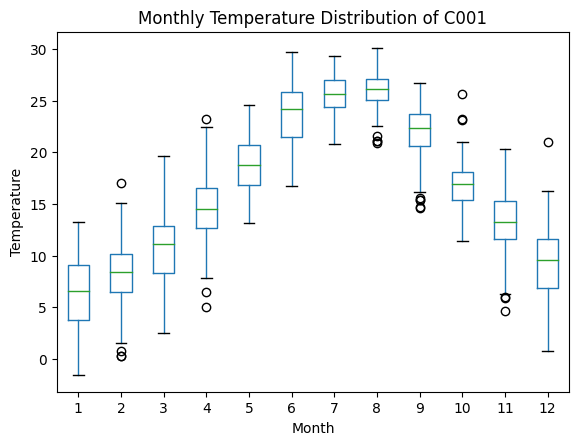

<Figure size 1200x600 with 0 Axes>

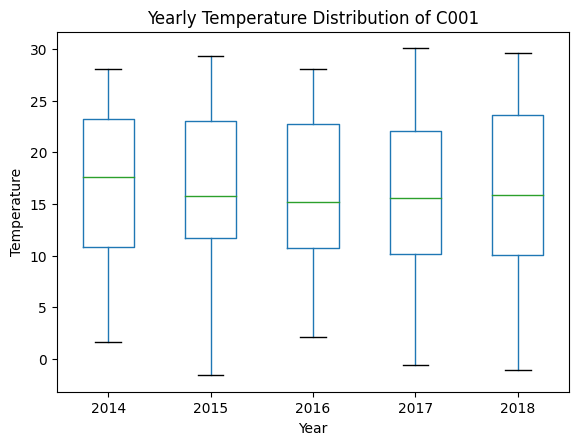

In [21]:
# Extract month and year from the date
df1['Month'] = df1.index.month
df1['Year'] = df1.index.year

# Box plot by month
plt.figure(figsize=(12, 6))
df1.boxplot(column='avg_temp_c', by='Month', grid=False)
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Monthly Temperature Distribution of C001')
plt.suptitle('')
plt.show()

# Box plot by year
plt.figure(figsize=(12, 6))
df1.boxplot(column='avg_temp_c', by='Year', grid=False)
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Yearly Temperature Distribution of C001')
plt.suptitle('')
plt.show()


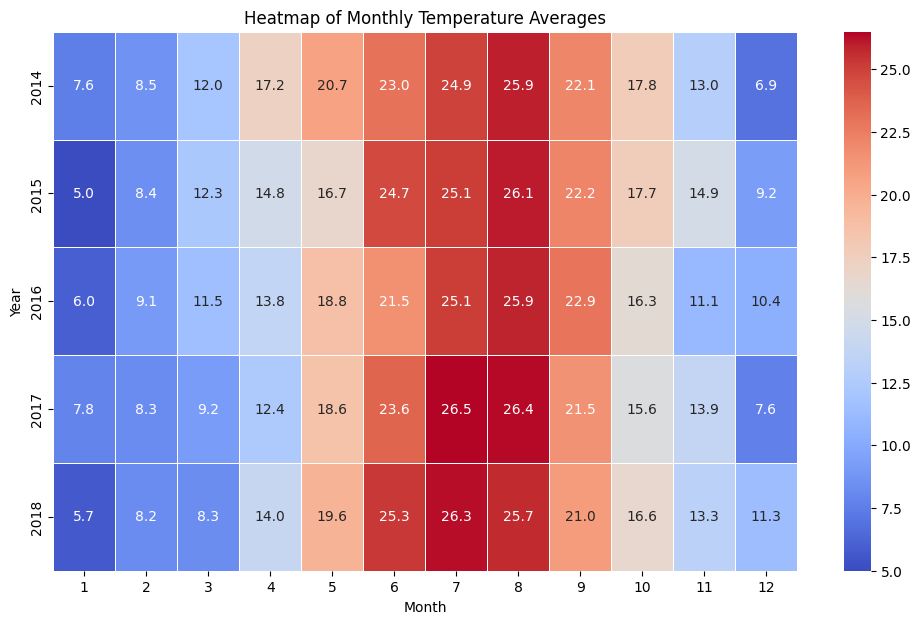

In [22]:
import seaborn as sns

# Create a pivot table for the heatmap
pivot = df1.pivot_table(values='avg_temp_c', index=df1.index.year, columns=df1.index.month)

plt.figure(figsize=(12, 7))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap='coolwarm', linewidths=.5)
plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Heatmap of Monthly Temperature Averages')
plt.show()


In [23]:
# Resample the data by month and calculate mean and median
monthly_mean = df1['avg_temp_c'].resample('M').mean()
monthly_median = df1['avg_temp_c'].resample('M').median()



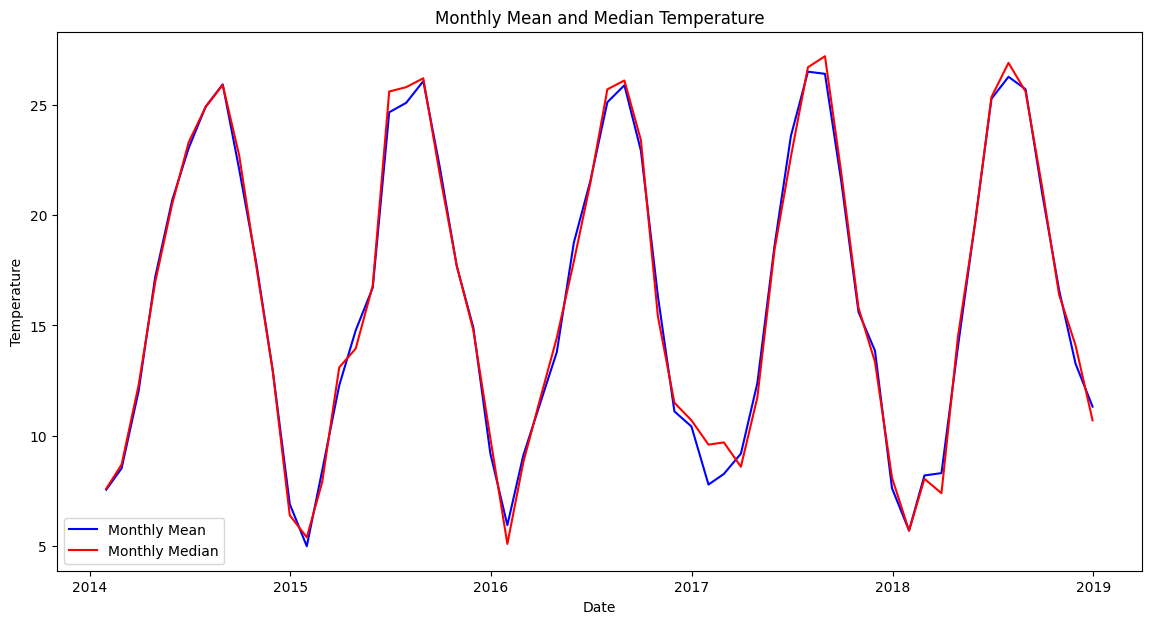

In [24]:
plt.figure(figsize=(14, 7))

# Plot monthly mean
plt.plot(monthly_mean.index, monthly_mean, label='Monthly Mean', color='blue')

# Plot monthly median
plt.plot(monthly_median.index, monthly_median, label='Monthly Median', color='red')

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Monthly Mean and Median Temperature')
plt.legend()
plt.show()
